# COMCAST TELECOMMUNICATION

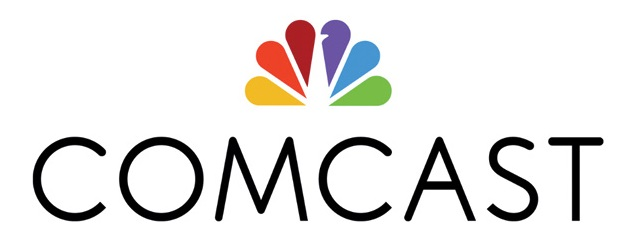

###### DESCRIPTION :
Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.


###### Data Dictionary
* Ticket #: Ticket number assigned to each complaint
* Customer Complaint: Description of complaint
* Date: Date of complaint
* Time: Time of complaint
* Received Via: Mode of communication of the complaint
* City: Customer city
* State: Customer state
* Zipcode: Customer zip
* Status: Status of complaint
* Filing on behalf of someone


###### Analysis Task :
1.Provide the trend chart for the number of complaints at monthly and daily granularity levels.<br> 
2.Provide a table with the frequency of complaint types.<br> 
3.Which complaint types are maximum i.e., around internet, network issues, or across any other domains.<br> 
4.Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.<br> 
5.Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
6.Which state has the maximum complaints<br> 
7.Which state has the highest percentage of unresolved complaints<br> 
8.Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

### Importing the Library

In [1]:
#Importing Python library for reading, writing, and perform basic operations
import numpy as np
import pandas as pd

# Importing library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Data

In [2]:
df = pd.read_csv('C:/Users/Administrator/Desktop/telecom_complaints_data/comcast_telecom_complaints.csv')

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
#Checking the shape of a dataset
df.shape

(2224, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 104.3+ KB


In [6]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [7]:
print(df.isnull().sum())

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64


In [8]:
# Change the datatype of "Date_month_year" and "Date_Time".
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [9]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


### 1. Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [10]:
# checking the trend chart for the number of complaints on daily granularity levels.
df["Date_month_year"].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-02-05      7
2015-12-05      7
2015-05-04      6
2015-03-05      5
2015-11-04      5
Name: Date_month_year, Length: 91, dtype: int64

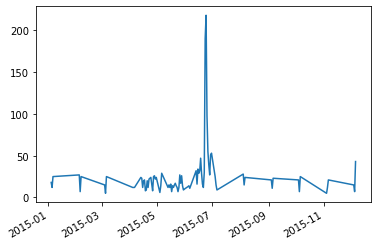

In [11]:
df["Date_month_year"].value_counts().plot();

June 24th, 2015 has the highest number of complaints

In [12]:
# Extracting the 'Months' from 'Date_month_year' columns
df['month'] = df['Date_month_year'].dt.month
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


In [13]:
# checking the trend chart for the number of complaints at monthly granularity levels.

x = df['month'].value_counts()
mon_comp = pd.DataFrame(x)
mon_comp = mon_comp.rename(columns = {"month" : "frequency"})
mon_comp['month'] = mon_comp.index
mon_comp = mon_comp.sort_values('month')
mon_comp.head(6)

,frequency,month
1,55,1
2,59,2
3,45,3
4,375,4
5,317,5
6,1046,6


<AxesSubplot:xlabel='month', ylabel='frequency'>

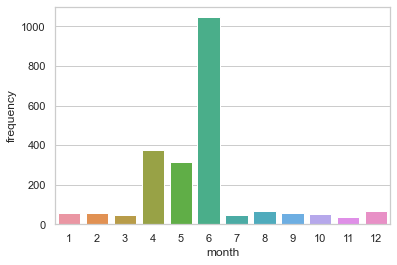

In [14]:
sns.set_theme(style="whitegrid")
sns.barplot(x = 'month', y = 'frequency', data = mon_comp)

June month has the highest number of complaints

### 2. Provide a table with the frequency of complaint types.

In [15]:
df['Customer Complaint'].value_counts()

Comcast                                                           83
Comcast Internet                                                  18
Comcast Data Cap                                                  17
comcast                                                           13
Comcast Billing                                                   11
                                                                  ..
Installation Charges                                               1
Paying for service for 12 months without recieving the service     1
Double billing from Comcast                                        1
Comcast monopoly hurting my business                               1
Week long issues with speed and no help from comcast               1
Name: Customer Complaint, Length: 1841, dtype: int64

Comcast contains the highest frequency of complain types.

### 3. Which complaint types are maximum i.e., around internet, network issues, or across any other domains?

In [16]:
df.groupby(["Received Via"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()

Received Via    Internet
Count               1119
dtype: object

### 4. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [17]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [18]:
df["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,newStatus
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2,Closed
2221,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,9,Closed
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,Closed


### 5. Which state has the maximum complaints?

In [19]:
df.groupby(["State"]).size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

### 6. Provide state wise status of complaints in a stacked bar chart. 

In [20]:
Status_complaints = df.groupby(["State","newStatus"]).size().unstack()
print(Status_complaints)

newStatus             Closed  Open
State                             
Alabama                 17.0   9.0
Arizona                 14.0   6.0
Arkansas                 6.0   NaN
California             159.0  61.0
Colorado                58.0  22.0
Connecticut              9.0   3.0
Delaware                 8.0   4.0
District Of Columbia    14.0   2.0
District of Columbia     1.0   NaN
Florida                201.0  39.0
Georgia                208.0  80.0
Illinois               135.0  29.0
Indiana                 50.0   9.0
Iowa                     1.0   NaN
Kansas                   1.0   1.0
Kentucky                 4.0   3.0
Louisiana               12.0   1.0
Maine                    3.0   2.0
Maryland                63.0  15.0
Massachusetts           50.0  11.0
Michigan                92.0  23.0
Minnesota               29.0   4.0
Mississippi             23.0  16.0
Missouri                 3.0   1.0
Montana                  1.0   NaN
Nevada                   1.0   NaN
New Hampshire       

<AxesSubplot:xlabel='State'>

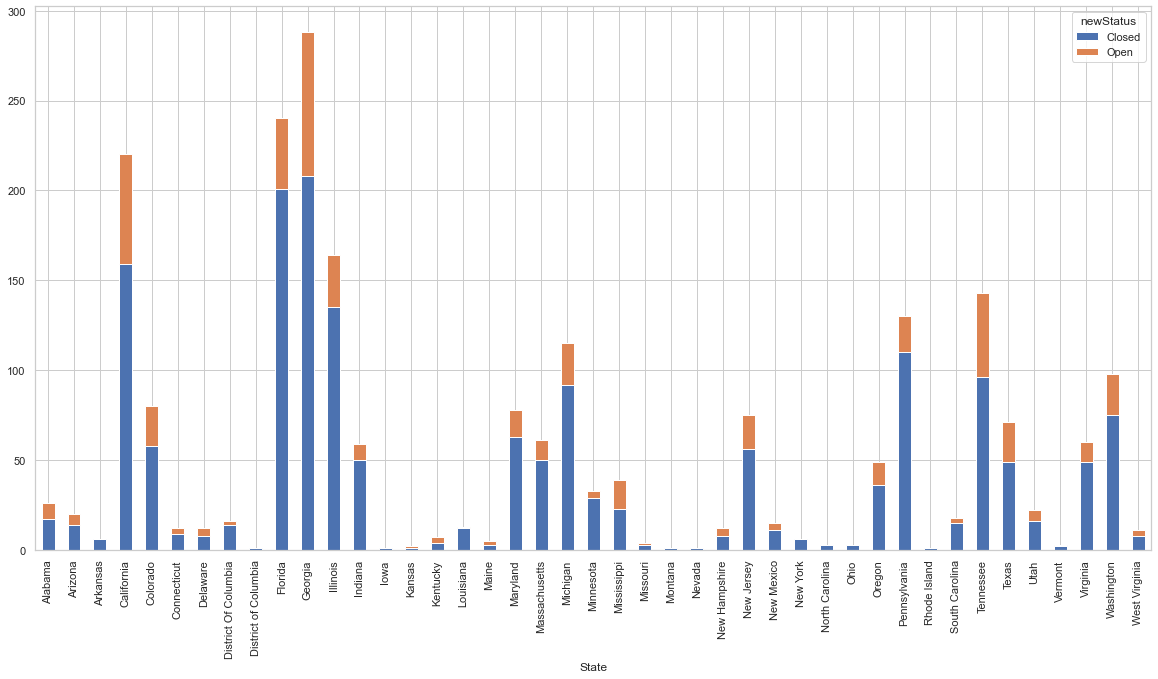

In [21]:
Status_complaints.plot.bar(figsize=(20,10), stacked=True)

* The highest number of complaints recorded from the state Georgia and the second highest number of complaints recorded from the state Florida.

### 7. Which state has the highest percentage of unresolved complaints?

In [22]:
print(df['newStatus'].value_counts())

Closed    1707
Open       517
Name: newStatus, dtype: int64


newStatus             Closed  Open  Unresolved_cmp_prct
State                                                  
Georgia                208.0  80.0            15.473888
California             159.0  61.0            11.798839
Tennessee               96.0  47.0             9.090909
Florida                201.0  39.0             7.543520
Illinois               135.0  29.0             5.609284
Washington              75.0  23.0             4.448743
Michigan                92.0  23.0             4.448743
Colorado                58.0  22.0             4.255319
Texas                   49.0  22.0             4.255319
Pennsylvania           110.0  20.0             3.868472
New Jersey              56.0  19.0             3.675048
Mississippi             23.0  16.0             3.094778
Maryland                63.0  15.0             2.901354
Oregon                  36.0  13.0             2.514507
Virginia                49.0  11.0             2.127660
Massachusetts           50.0  11.0             2

<AxesSubplot:xlabel='State'>

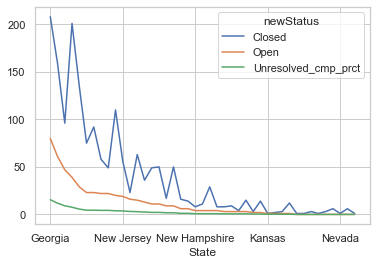

In [23]:
unresolved_data = df.groupby(["State",'newStatus']).size().unstack().fillna(0).sort_values(by='Open',ascending=False)
unresolved_data['Unresolved_cmp_prct'] = unresolved_data['Open']/unresolved_data['Open'].sum()*100
print(unresolved_data)
unresolved_data.plot()

### 8. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care call.

In [24]:
resolved_data = df.groupby(['Received Via','newStatus']).size().unstack().fillna(0)
resolved_data['resolved'] = resolved_data['Closed']/resolved_data['Closed'].sum()*100
resolved_data['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

<AxesSubplot:xlabel='Received Via'>

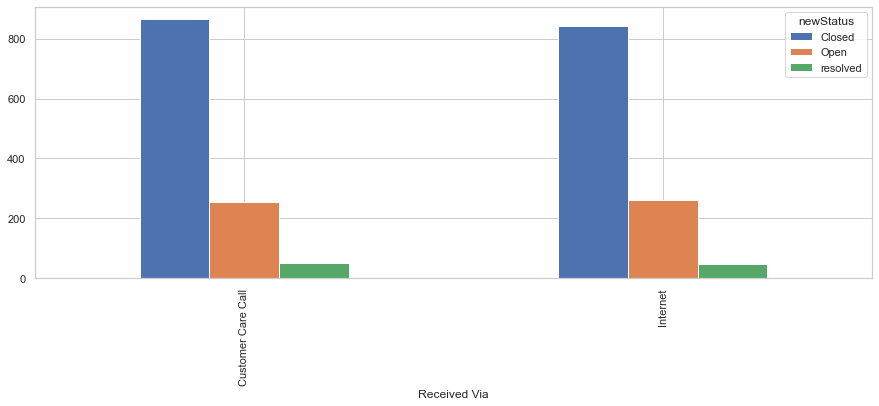

In [25]:
resolved_data.plot(kind="bar", figsize=(15,5))

# References :


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

https://www.dezyre.com/recipes/unstack-python